# Exploring the UTx000 Extension Beacon Data
(Known as BPEACE2 in the [GH repo](https://github.com/intelligent-environments-lab/utx000))

# Summary
This notebook helps look at the measurements taken during the study period for the various sensors on the beacons.

# Package Import

In [2]:
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

# Data Import

In [3]:
beacon_data = pd.read_csv('../data/processed/bpeace2-beacon.csv',index_col=0,parse_dates=True)
# show it off:
beacon_data.head()

,TVOC,eCO2,Lux,Visible,Infrared,NO2,T_NO2,RH_NO2,CO,T_CO,...,PM_N_4,PM_N_10,PM_C_1,PM_C_2p5,PM_C_4,PM_C_10,Beacon,Beiwe,Fitbit,REDCap
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-08 00:00:00,537.88,990.12,0.0,0.0,0.0,74.64,28.0,36.80,-0.68488,28.0,...,39.961129,40.164481,4.925515,11.135812,15.932873,16.892285,1,kyj367pi,24,10
2020-06-08 00:05:00,537.70,1006.65,0.0,0.0,0.0,75.85,28.0,37.00,-0.52275,28.0,...,32.546536,32.691019,4.020243,8.442126,11.833886,12.512238,1,kyj367pi,24,10
2020-06-08 00:10:00,537.64,1020.24,0.0,0.0,0.0,76.56,28.0,37.00,-0.78328,28.0,...,34.809603,34.927838,4.314605,7.951792,10.694790,11.243390,1,kyj367pi,24,10
2020-06-08 00:15:00,542.40,1080.52,0.0,0.0,0.0,74.52,28.0,36.28,-0.83856,28.0,...,40.619122,40.779581,5.025503,9.946487,13.695432,14.445220,1,kyj367pi,24,10
2020-06-08 00:20:00,541.04,1093.04,0.0,0.0,0.0,74.92,28.0,36.40,-0.48872,28.0,...,37.065600,37.242149,4.573548,9.970680,14.125998,14.957063,1,kyj367pi,24,10


# Base Visualization
Here we look at the raw, unaltered data in order to ascertain:
- what data are available? (see 4.1.1 notebook to see when participants actually measured data)
- what are typical measurements and what does this say?
- are there any misbehaving sensors?

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.colors import LogNorm

## Heatmap
These heatmaps show the values, but are more useful for determining when data are available.

Working for PM_C_2p5
	Data collected
	Plotting


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


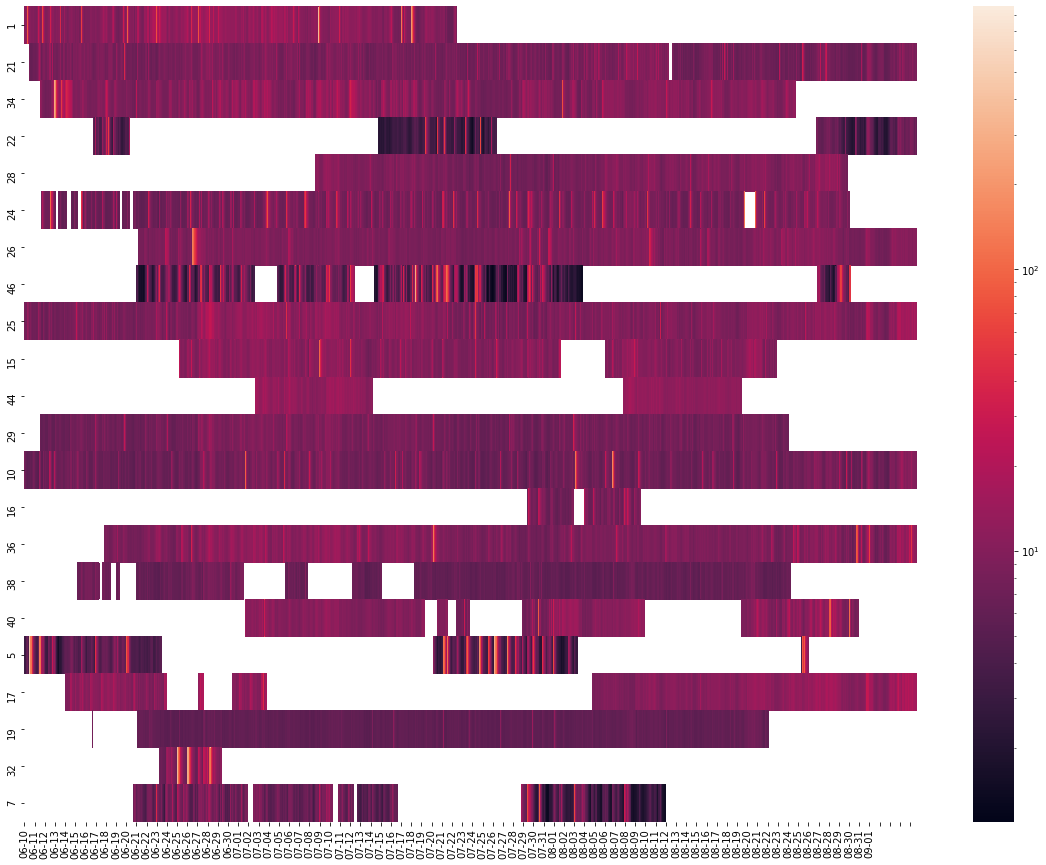

Working for CO2
	Data collected
	Plotting


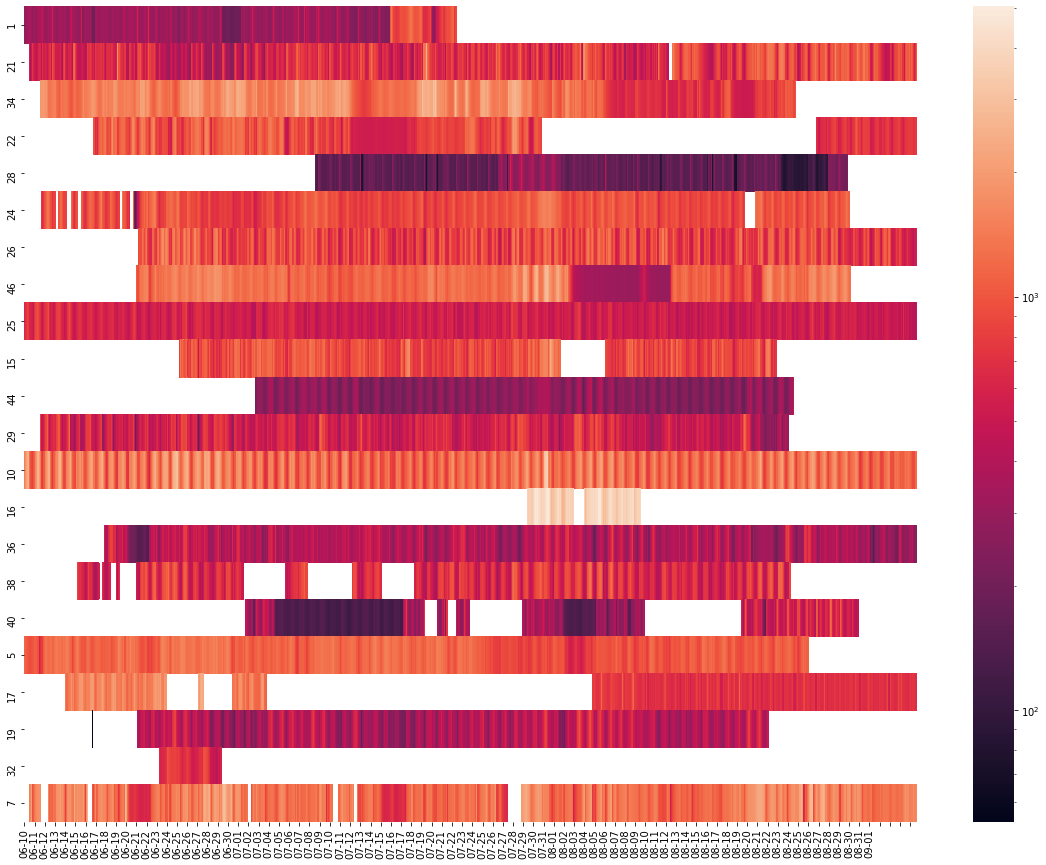

Working for CO
	Data collected
	Plotting


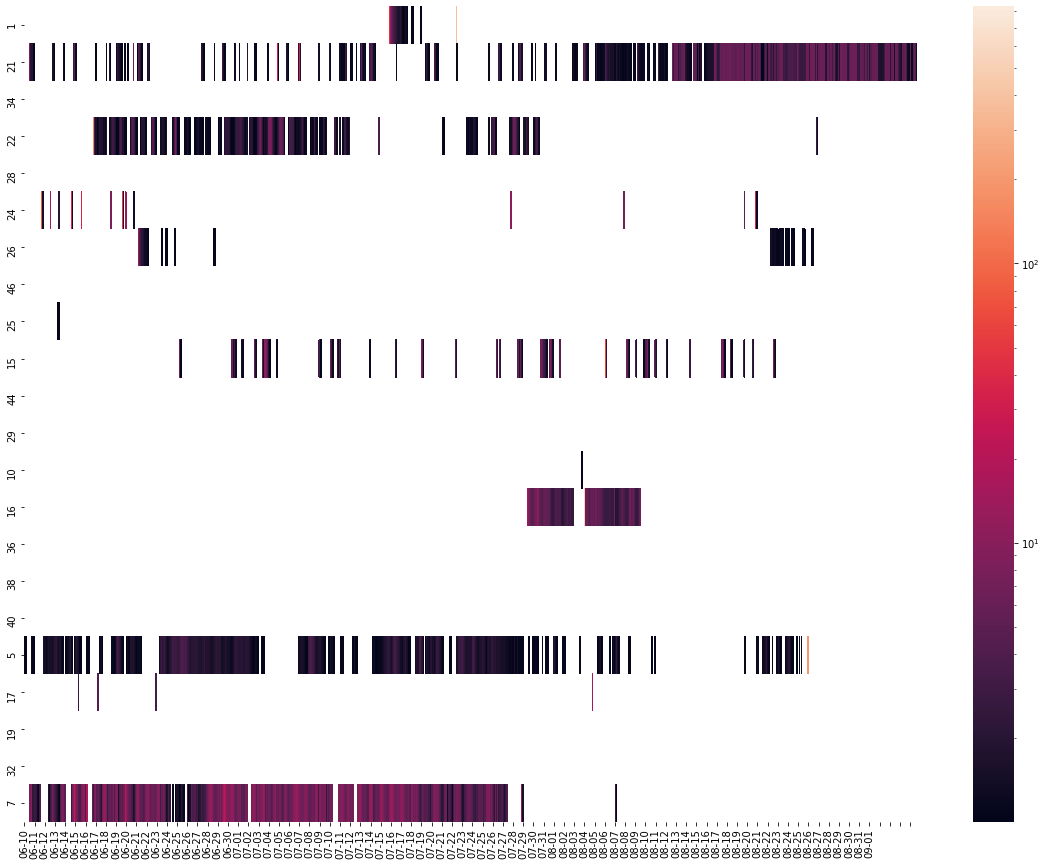

Working for NO2
	Data collected
	Plotting


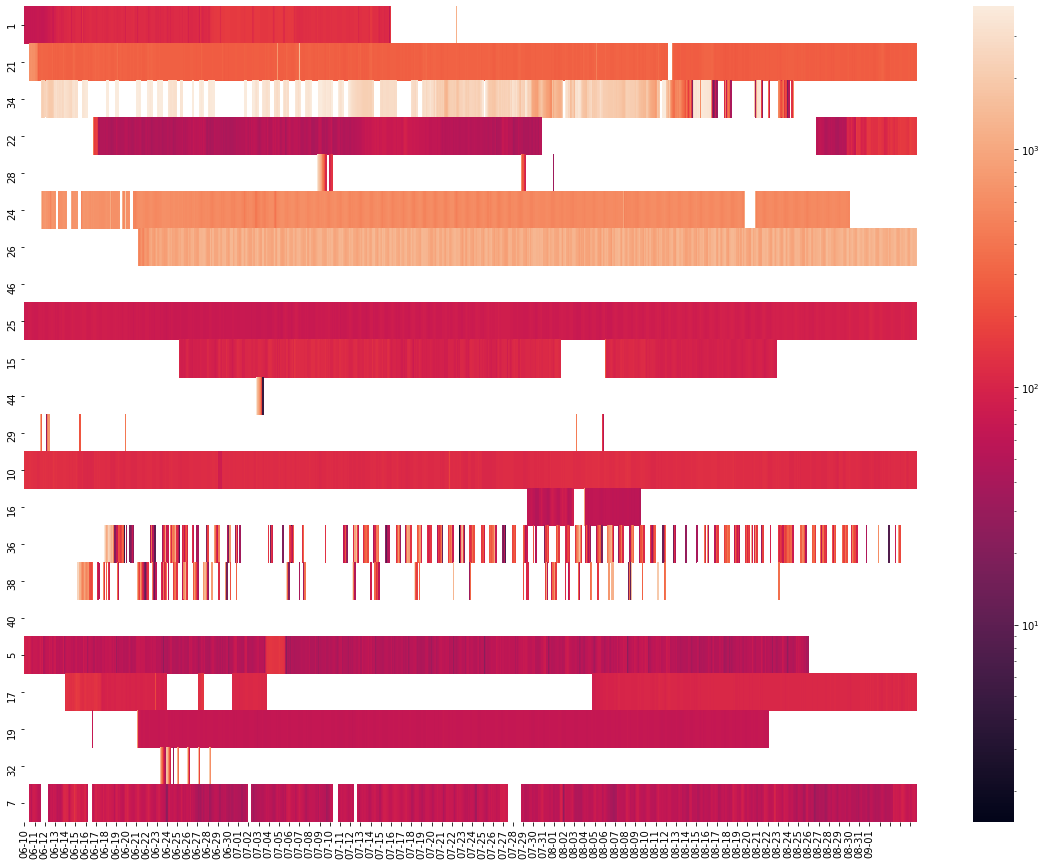

Working for T_NO2
	Data collected
	Plotting


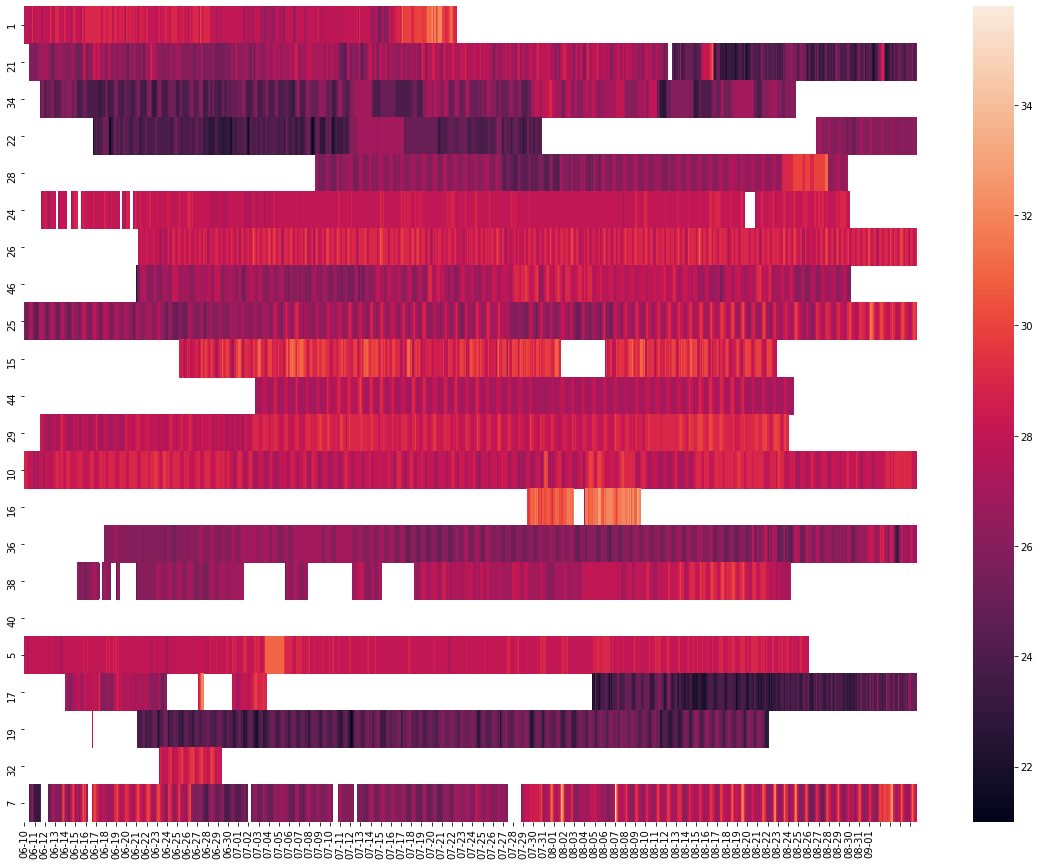

Working for Lux
	Data collected
	Plotting


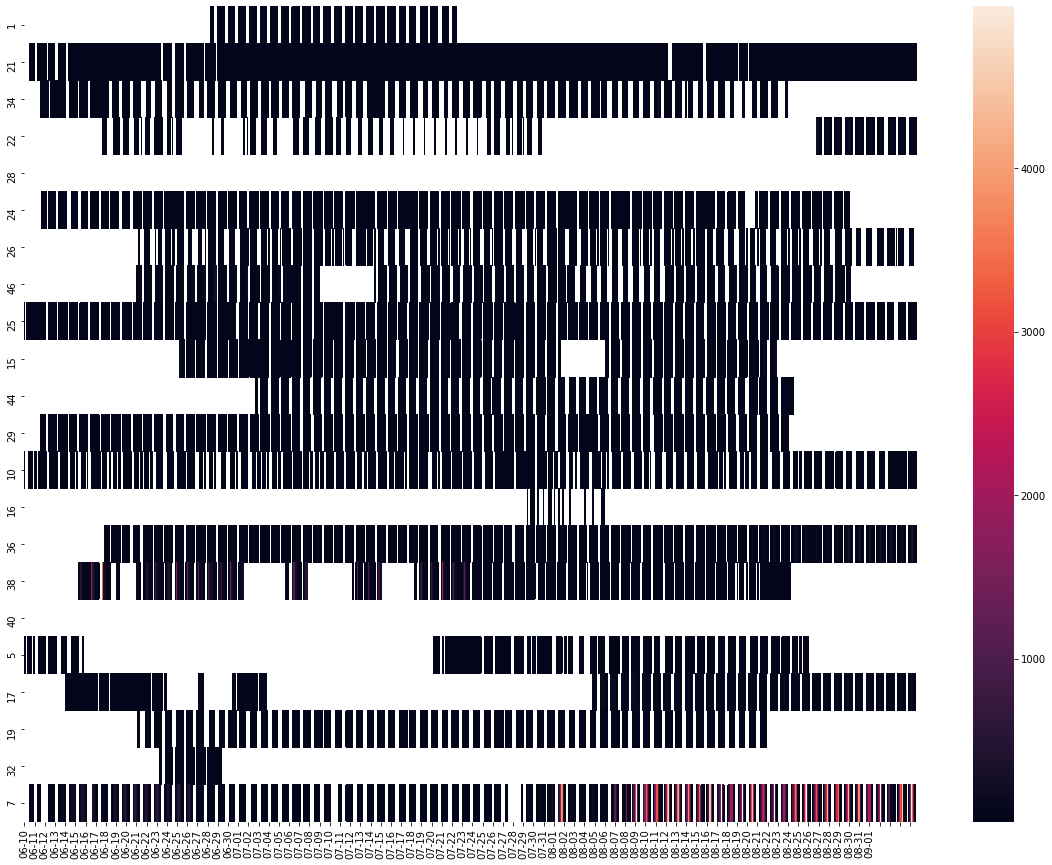

In [5]:
var_list = ['PM_C_2p5','CO2','CO','NO2','T_NO2','Lux']
limit_list = [[1,75],[1,2000],[1,20],[1,100],[1,50],[0,600000]]
for variable, limits in zip(var_list, limit_list):
    print(f'Working for {variable}')
    heatmap_df = pd.DataFrame()
    for beacon in beacon_data['Beacon'].unique():
        data_by_beacon = beacon_data[beacon_data['Beacon'] == beacon]
        data_by_beacon = data_by_beacon[data_by_beacon[variable] > 1]
        if variable == 'NO2':
            data_by_beacon = data_by_beacon[data_by_beacon[variable] < 5000]
        data_by_beacon = data_by_beacon.resample('1h').mean()
        sdate = datetime(2020,6,10)
        edate = datetime(2020,9,2)
        data_by_beacon = data_by_beacon[sdate:edate]
        heatmap_df = pd.concat([heatmap_df,data_by_beacon[variable]],axis=1)
        heatmap_df.rename(columns={variable:beacon}, inplace=True)

    print(f'\tData collected')
    fig, ax = plt.subplots(figsize=(20,15))
    df_to_plot = heatmap_df.T
    print(f'\tPlotting')
    if variable[0] in ['T','L']:
        sns.heatmap(df_to_plot,vmin=np.nanmin(df_to_plot),vmax=np.nanmax(df_to_plot))
    else:
        sns.heatmap(df_to_plot,norm=LogNorm(vmin=np.nanmin(df_to_plot),vmax=np.nanmax(df_to_plot)))
        
    x_labels = []
    for d in pd.date_range(sdate,edate-timedelta(days=1),freq='d'):
        x_labels.append(d.strftime('%m-%d'))
        
    ax.set_xticklabels(x_labels)
    
    plt.show()
    plt.close()

## Density Plots
These plots help show typical measurements by the sensors

Working for PM_C_2p5
	Plotting


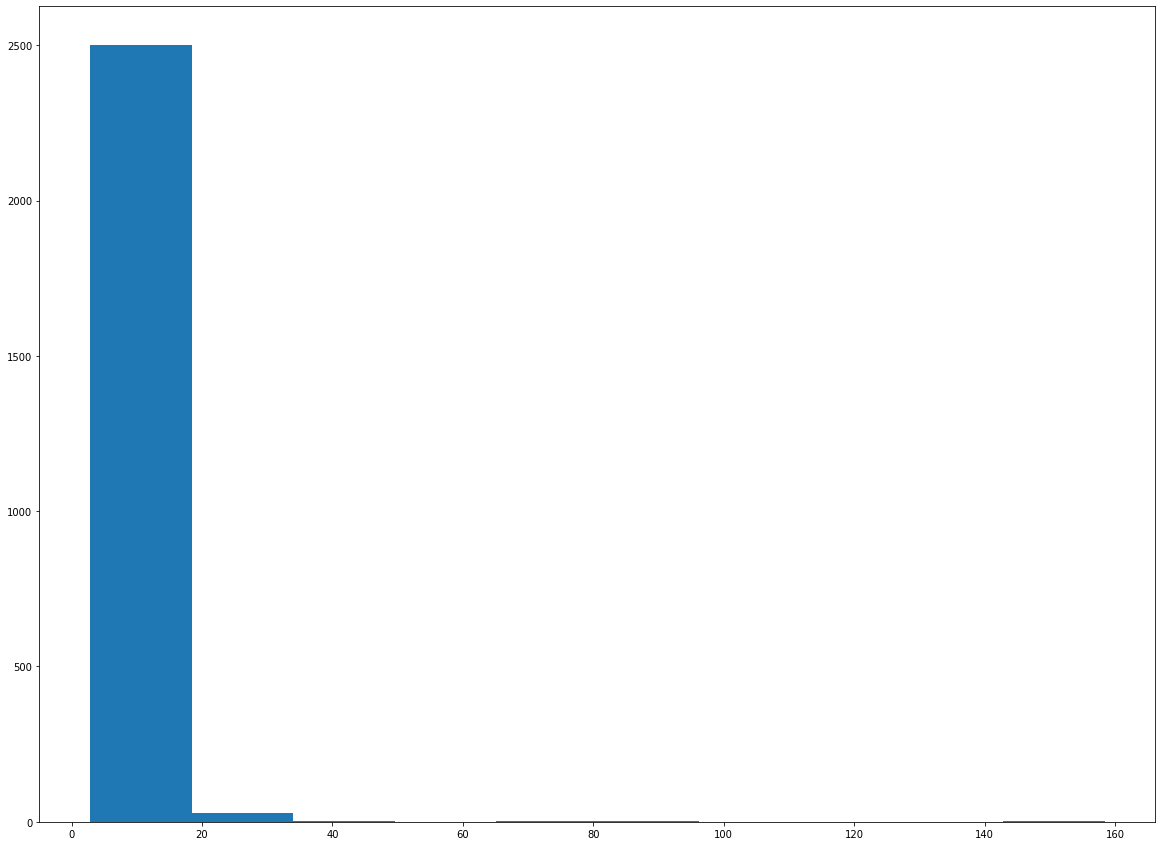

Working for CO2
	Plotting


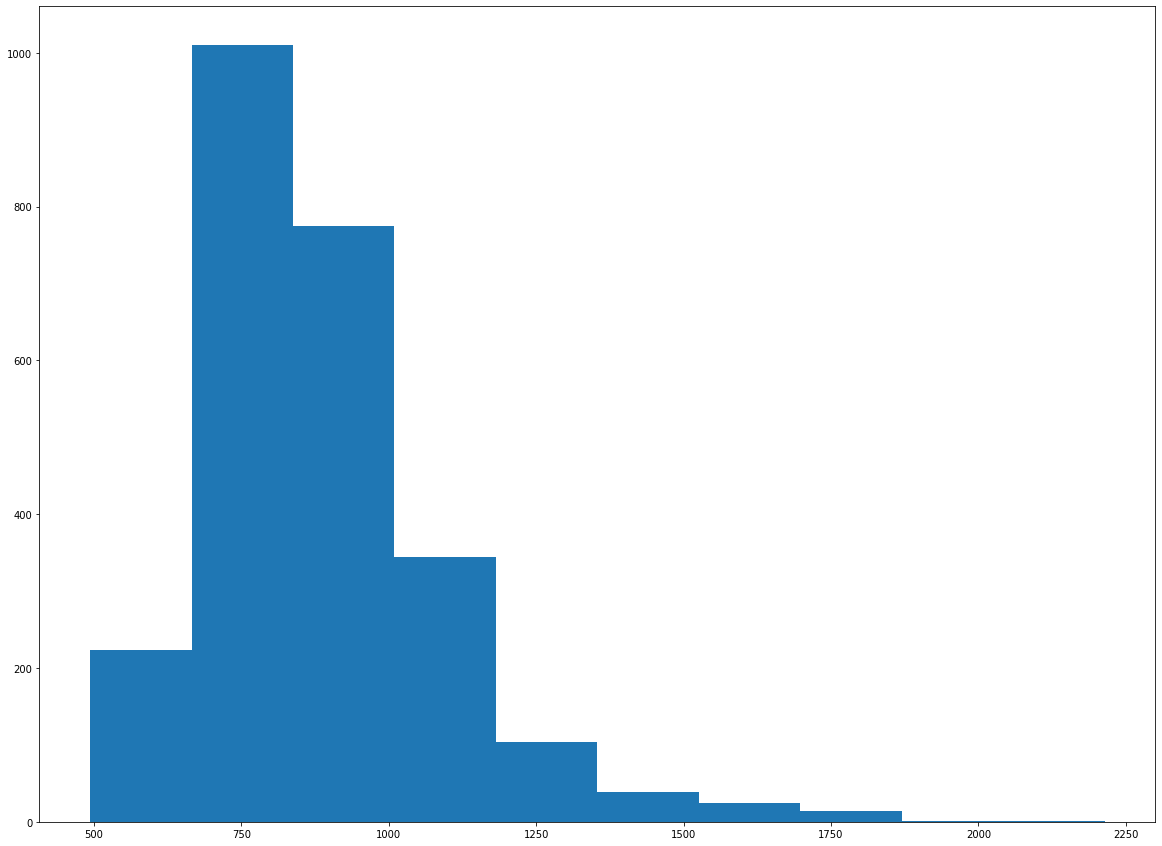

Working for CO
	Plotting


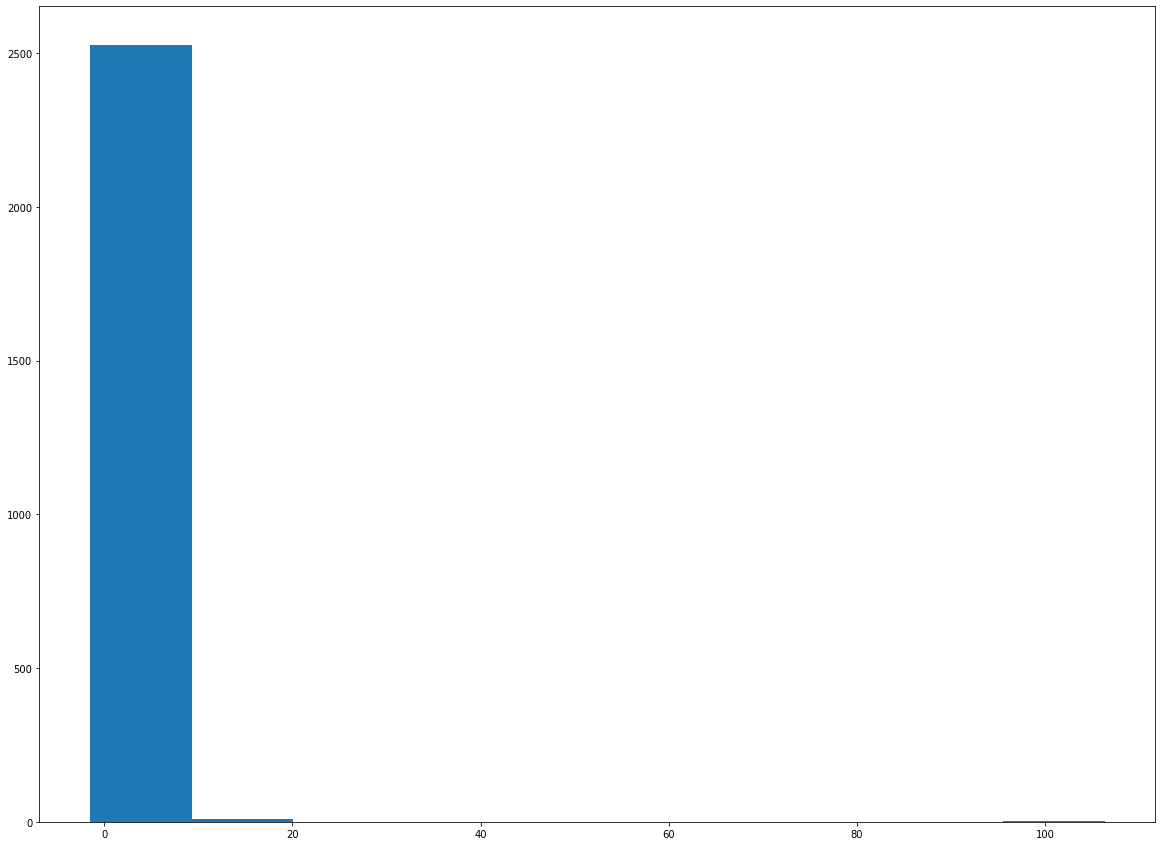

Working for NO2
	Plotting


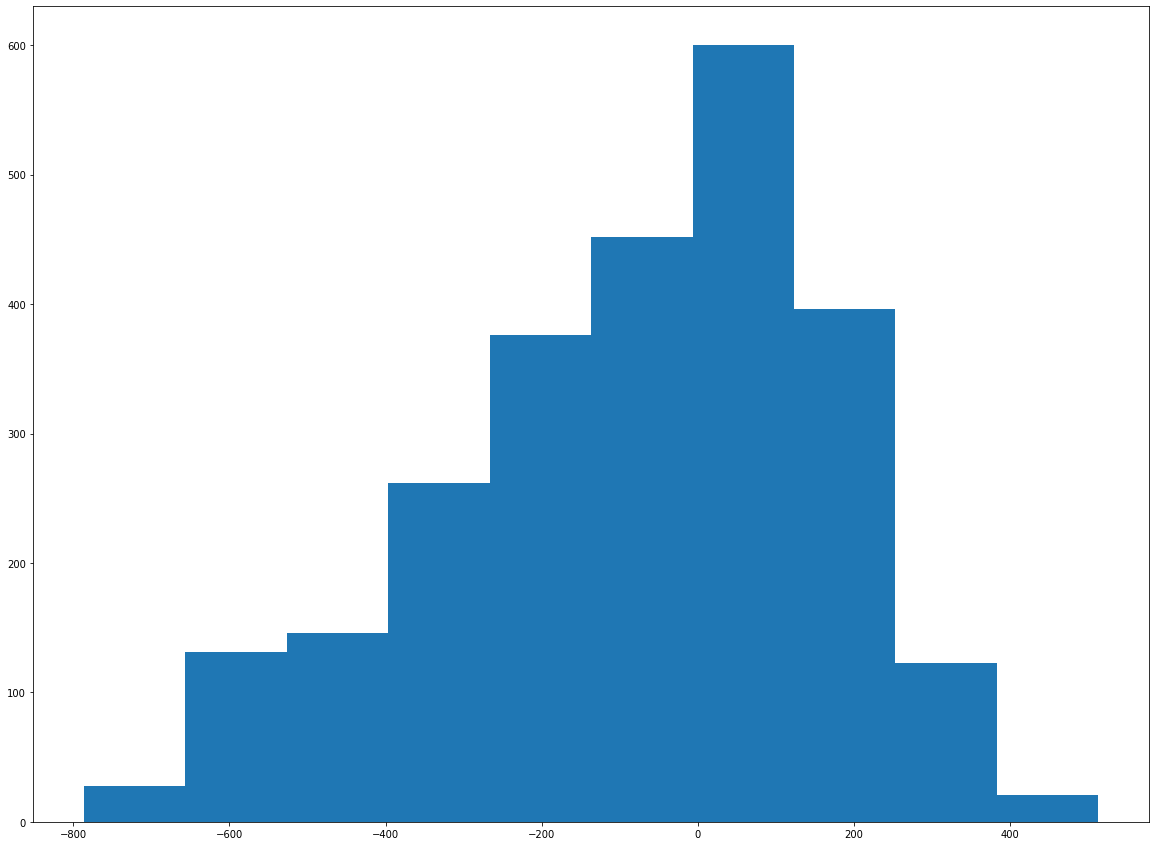

Working for T_NO2
	Plotting


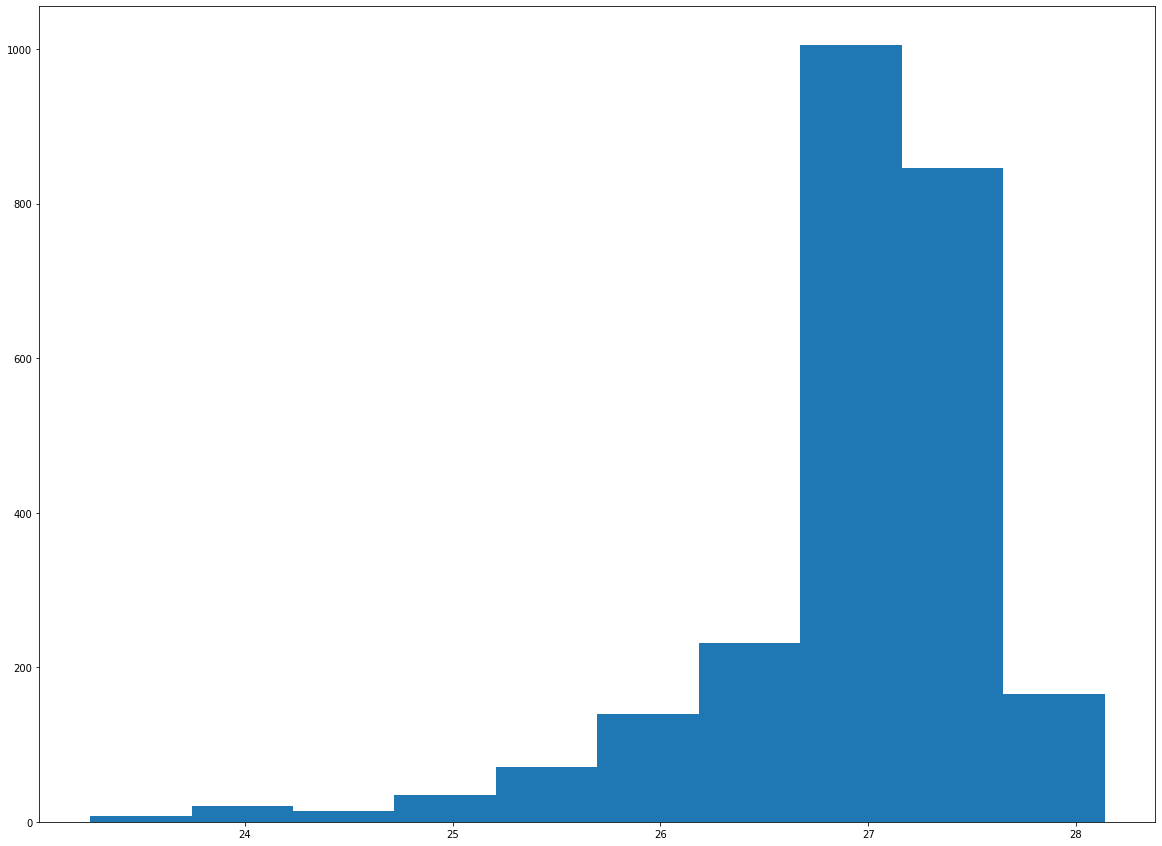

In [16]:
var_list = ['PM_C_2p5','CO2','CO','NO2','T_NO2']
bins=[[0,12,35,55,150,250,10000],
      [0,600,1000,2500,5000,10000],
      [0,4,9,12,15,30],
      [0,50,100,360,650,1250],
      [15,18,20,26,28,31]]
for variable in var_list:
    print(f'Working for {variable}')
    fig, ax = plt.subplots(figsize=(20,15))
    print(f'\tPlotting')
    if variable == 'NO2':
        beacon_data = beacon_data[beacon_data[variable] < 5000]
        
    beacon_data_hourly = beacon_data.resample('60T').mean()
    ax.hist(beacon_data_hourly[variable])
    
    plt.show()
    plt.close()